<a href="https://colab.research.google.com/github/JLDaniel77/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
headers = ['Age', 'Year of Operation', 'Number of Pos Axillary Nodes Detected', 'Survival Status']

# Load data
df_survival = pd.read_csv(data_url, header=None, names=headers)
# Inspect 1st 5 rows
print(df_survival.head())
# Validate DataFrame has correct number of observations
print(df_survival.shape)

   Age  Year of Operation  Number of Pos Axillary Nodes Detected  \
0   30                 64                                      1   
1   30                 62                                      3   
2   30                 65                                      0   
3   31                 59                                      2   
4   31                 65                                      4   

   Survival Status  
0                1  
1                1  
2                1  
3                1  
4                1  
(306, 4)


In [29]:
# Check for missing data
df_survival_nan = df_survival.replace('?', np.NaN)
print(df_survival_nan.isnull().sum())
print(df_survival_nan.isna().sum())

Age                                      0
Year of Operation                        0
Number of Pos Axillary Nodes Detected    0
Survival Status                          0
dtype: int64
Age                                      0
Year of Operation                        0
Number of Pos Axillary Nodes Detected    0
Survival Status                          0
dtype: int64


In [30]:
# Convert class attribute to bool values
survived_bool_values = {1: True, 2: False}
df_survival['Survived > 5 yrs'] = df_survival['Survival Status'].replace(survived_bool_values)
df_survival.head()

,Age,Year of Operation,Number of Pos Axillary Nodes Detected,Survival Status,Survived > 5 yrs
0,30,64,1,1,True
1,30,62,3,1,True
2,30,65,0,1,True
3,31,59,2,1,True
4,31,65,4,1,True


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [31]:
# Inspect dataframe summary statistics
df_survival.describe()

,Age,Year of Operation,Number of Pos Axillary Nodes Detected,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [32]:
# Create crosstab of Age and Survival Stuatus
age_bins = pd.cut(df_survival['Age'], bins=5)
pd.crosstab(df_survival['Survival Status'], age_bins)

Age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
Survival Status,,,,,
1,39,68,69,43,6
2,4,31,27,16,3


In [46]:
# Pivot table indexed by Survived > 5 years
pd.pivot_table(df_survival, index=df_survival['Survived > 5 yrs'])

,Age,Number of Pos Axillary Nodes Detected,Survival Status,Year of Operation
Survived > 5 yrs,,,,
False,53.679012,7.456790,2.0,62.827160
True,52.017778,2.791111,1.0,62.862222


In [47]:
# pivot table indexed by age bins
pd.pivot_table(df_survival, index=age_bins)

,Age,Number of Pos Axillary Nodes Detected,Survival Status,Survived > 5 yrs,Year of Operation
Age,,,,,
"(29.947, 40.6]",36.139535,3.813953,1.093023,0.906977,62.162791
"(40.6, 51.2]",45.909091,4.181818,1.313131,0.686869,62.757576
"(51.2, 61.8]",55.927083,4.604167,1.281250,0.718750,63.093750
"(61.8, 72.4]",66.118644,3.423729,1.271186,0.728814,62.966102
"(72.4, 83.0]",75.888889,1.111111,1.333333,0.666667,63.888889


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1810376a0>,
      dtype=object)

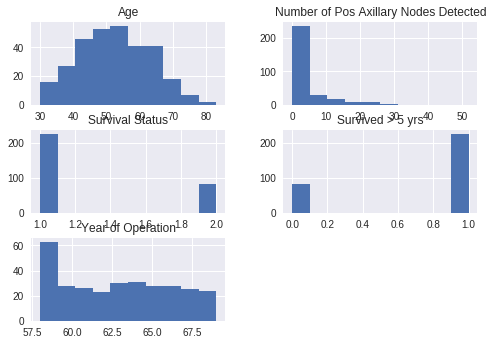

In [33]:
# Create DataFrame subplot histograms
df_survival.hist()

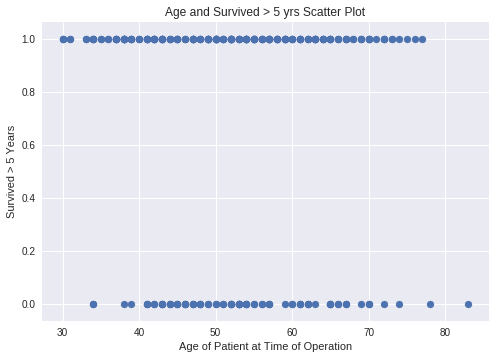

In [54]:
# Create scatter plot of relationship between Age and Survival > 5 yrs
plt.scatter(df_survival['Age'], df_survival['Survived > 5 yrs'])
plt.title('Age and Survived > 5 yrs Scatter Plot')
plt.xlabel('Age of Patient at Time of Operation')
plt.ylabel('Survived > 5 Years')
plt.show()

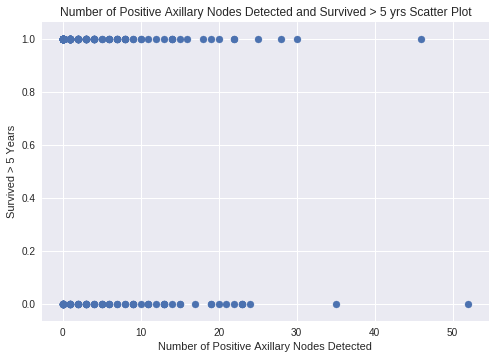

In [52]:
# Create scatter plot of relationship between Number of Positive Axillary Nodes Detected and Survival > 5 yrs
plt.scatter(df_survival['Number of Pos Axillary Nodes Detected'], df_survival['Survived > 5 yrs'])
plt.title('Number of Positive Axillary Nodes Detected and Survived > 5 yrs Scatter Plot')
plt.xlabel('Number of Positive Axillary Nodes Detected')
plt.ylabel('Survived > 5 Years')
plt.show()

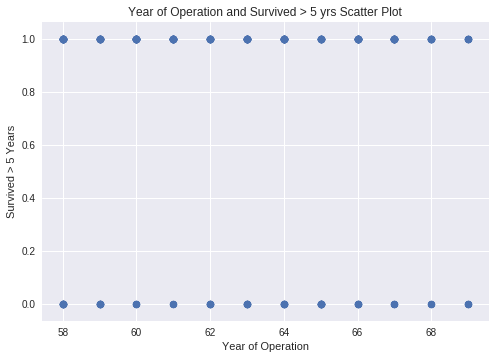

In [57]:
# Create scatter plot of relationship between Year of Operation and Survival > 5 yrs
plt.scatter(df_survival['Year of Operation'], df_survival['Survived > 5 yrs'])
plt.title('Year of Operation and Survived > 5 yrs Scatter Plot')
plt.xlabel('Year of Operation')
plt.ylabel('Survived > 5 Years')
plt.show()

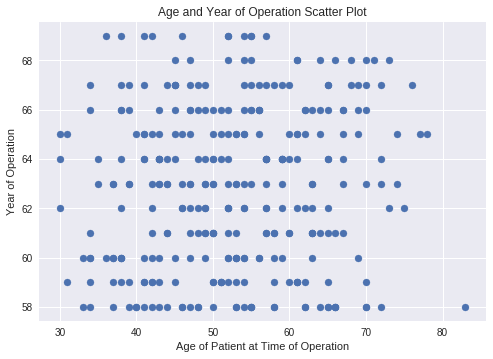

In [55]:
# Create scatter plot of relationship between Age and Year of Operation
plt.scatter(df_survival['Age'], df_survival['Year of Operation'])
plt.title('Age and Year of Operation Scatter Plot')
plt.xlabel('Age of Patient at Time of Operation')
plt.ylabel('Year of Operation')
plt.show()

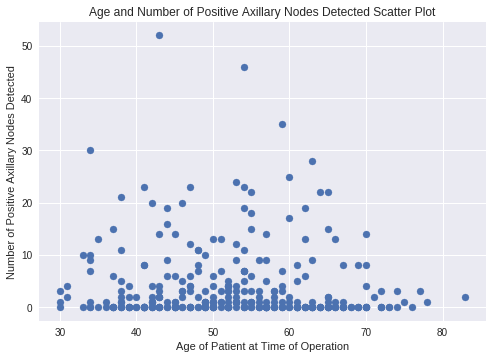

In [56]:
# Create scatter plot of relationship between Year of Operation and Survival > 5 yrs
plt.scatter(df_survival['Age'], df_survival['Number of Pos Axillary Nodes Detected'])
plt.title('Age and Number of Positive Axillary Nodes Detected Scatter Plot')
plt.xlabel('Age of Patient at Time of Operation')
plt.ylabel('Number of Positive Axillary Nodes Detected')
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1. Based on the pivot table indexed by survival,  it appears there's a slight positive relationship between the year of operation and survival. Which means that survival rate increased as year of operation increased.

2. Based on the scatter plot between patient's age at time of operation and survival, and the pivot table indexed by age, age appears to have a negative relationship with survival. Which means that the older the patient was at the time of the operation, the lower their chances of survival.

3. There is no relationship between the patient's age at time of operation and the year of operation. This indicates that age does not affect the relationship between operation year and survival, and vice versa. This leads me to believe that those relationships are real.